# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_WoE_and_IV.pdf)

## Grading = 10 Points

### Download the dataset

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Install Packages

In [ ]:
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [ ]:
!pip install xverse

### Import Neccesary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [ ]:
# YOUR CODE HERE
df = pd.read_csv('GiveMeSomeCredit.csv')
print(df.shape)
df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Describe the all statistical properties of the train dataset

In [ ]:
# YOUR CODE HERE
df[df.columns[1:]].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Pre-processing (1 point)

#### Remove unwanted columns

In [ ]:
# YOUR CODE HERE
df_cleaned = df.drop(['Unnamed: 0'], axis=1)
df_cleaned.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [ ]:
# YOUR CODE HERE
df_cleaned.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
df_cleaned = df_cleaned.fillna(df_cleaned.mean())
df_cleaned.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64


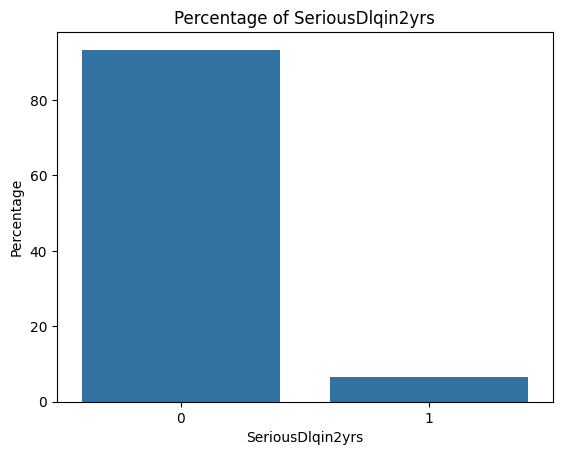

In [ ]:
# YOUR CODE HERE
percentage = df_cleaned['SeriousDlqin2yrs'].value_counts(normalize=True)*100
print(percentage)
sns.barplot(x=percentage.index, y=percentage.values)
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Percentage')
plt.title('Percentage of SeriousDlqin2yrs')
plt.show()

#### Plot the distribution of SeriousDlqin2yrs by age

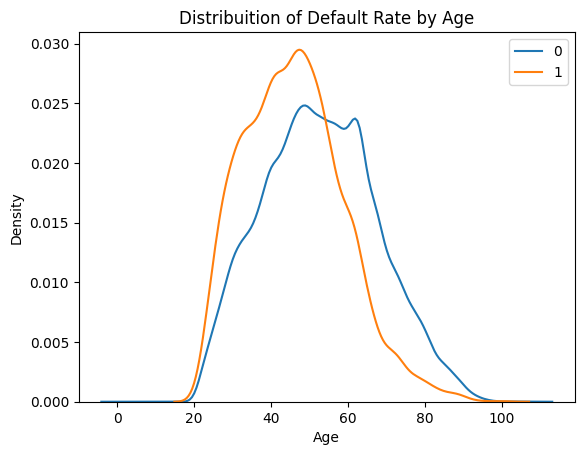

In [ ]:
# YOUR CODE HERE
#sns.histplot(x='age', hue='SeriousDlqin2yrs', data=df_cleaned, bins=10, stat='density')

sns.kdeplot(df_cleaned[df_cleaned["SeriousDlqin2yrs"] == 0]["age"], label="0")
sns.kdeplot(df_cleaned[df_cleaned["SeriousDlqin2yrs"] == 1]["age"], label="1")
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribuition of Default Rate by Age')
plt.legend()
plt.show()

#### Calculate the correlation and plot the heatmap

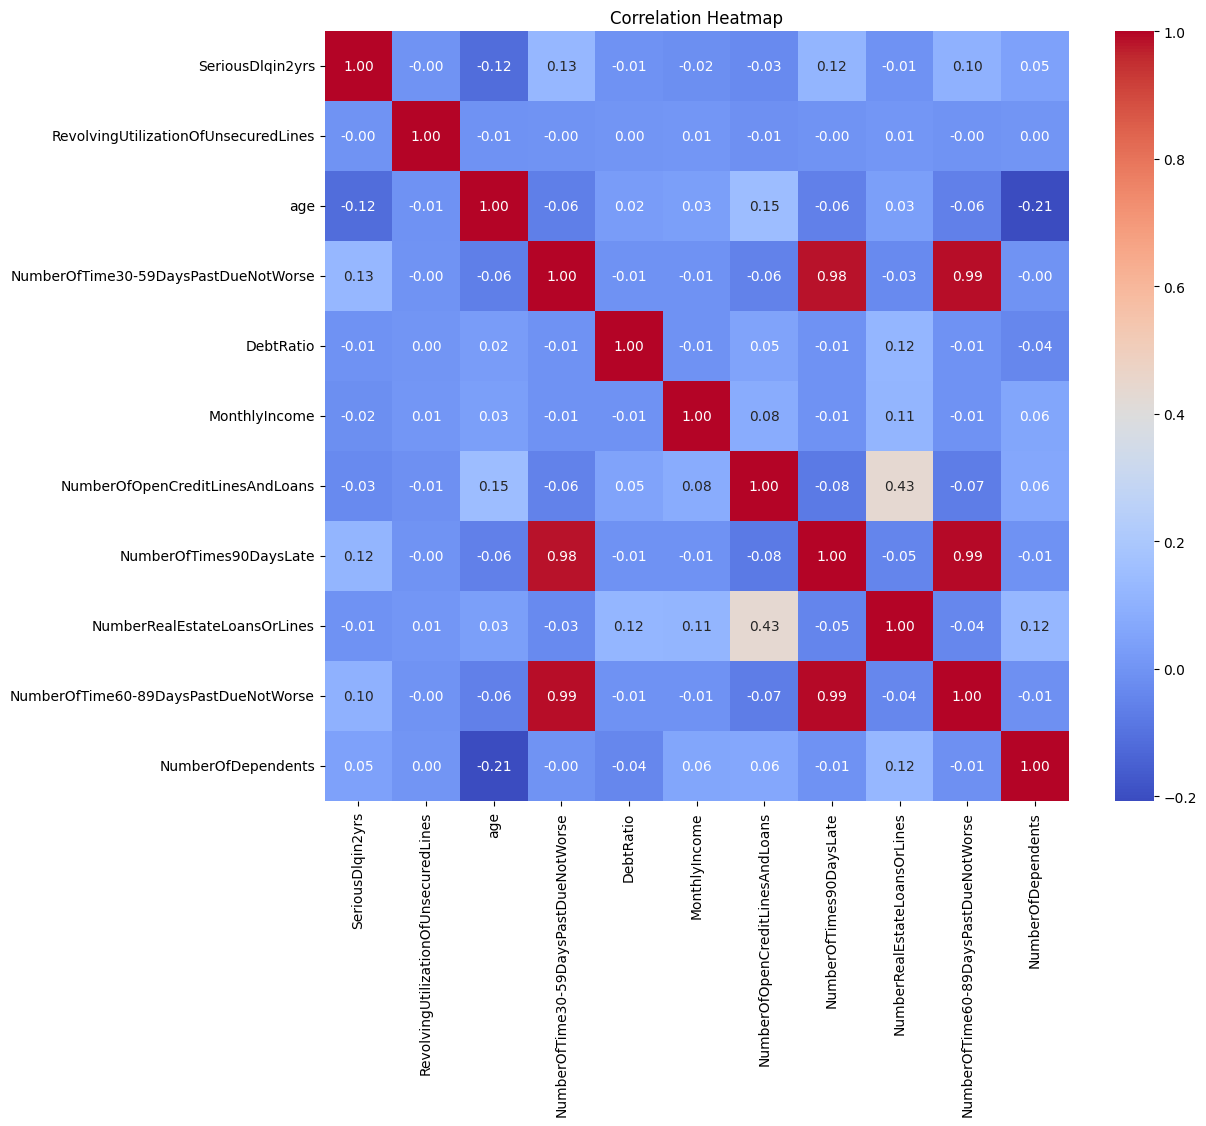

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', fmt='.2f', annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_Xverse.pdf). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [ ]:
# YOUR CODE HERE
from xverse.transformer import MonotonicBinning,WOE
clf_MB = MonotonicBinning()
out_MB = clf_MB.fit_transform(df_cleaned.iloc[:,1:], df_cleaned['SeriousDlqin2yrs'])
out_MB.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,"(0.38, 50708.0]","(-0.001, 45.0]","(1.0, 98.0]","(0.57, 329664.0]","(6670.221, 3008750.0]","(10.0, 58.0]","(-0.001, 1.0]","(1.0, 54.0]","(-0.001, 1.0]","(1.0, 20.0]"
1,"(0.38, 50708.0]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
2,"(0.38, 50708.0]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
3,"(0.0544, 0.38]","(-0.001, 45.0]","(-0.001, 1.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
4,"(0.38, 50708.0]","(45.0, 59.0]","(-0.001, 1.0]","(-0.001, 0.238]","(6670.221, 3008750.0]","(6.0, 10.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"


In [ ]:
clf_woe = WOE()
out_woe = clf_woe.fit_transform(df_cleaned.iloc[:,1:], df_cleaned['SeriousDlqin2yrs'])
out_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.916188,0.414666,1.901126,0.146810,-0.336321,-0.043992,-0.176674,-0.066080,-0.09799,0.269384
1,0.916188,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
2,0.916188,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
3,-0.802015,0.414666,-0.257826,-0.108543,0.300624,0.161831,-0.176674,0.024285,-0.09799,-0.088266
4,0.916188,0.043658,-0.257826,-0.108543,-0.336321,-0.200293,-0.176674,0.024285,-0.09799,-0.088266


In [ ]:
clf_woe.iv_df # Information value

,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,0.935429
6,NumberOfTimes90DaysLate,0.484202
4,NumberOfTime30-59DaysPastDueNotWorse,0.471831
5,NumberOfTime60-89DaysPastDueNotWorse,0.264824
9,age,0.219843
1,MonthlyIncome,0.065725
2,NumberOfDependents,0.023730
3,NumberOfOpenCreditLinesAndLoans,0.023300
0,DebtRatio,0.012360
7,NumberRealEstateLoansOrLines,0.001605


In [ ]:
best_features = clf_woe.iv_df.Variable_Name[clf_woe.iv_df.Information_Value > 0.1].tolist()
best_features

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTimes90DaysLate',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age']

In [ ]:
df_WOE = clf_woe.woe_df.loc[clf_woe.woe_df['Variable_Name'].isin(best_features)]
print(df_WOE[['Variable_Name', 'Category', 'WOE']])

                           Variable_Name          Category       WOE
0   RevolvingUtilizationOfUnsecuredLines  (-0.001, 0.0544] -1.389301
1   RevolvingUtilizationOfUnsecuredLines    (0.0544, 0.38] -0.802015
2   RevolvingUtilizationOfUnsecuredLines   (0.38, 50708.0]  0.916188
3                                    age    (-0.001, 45.0]  0.414666
4                                    age      (45.0, 59.0]  0.043658
5                                    age     (59.0, 109.0] -0.804528
6   NumberOfTime30-59DaysPastDueNotWorse     (-0.001, 1.0] -0.257826
7   NumberOfTime30-59DaysPastDueNotWorse       (1.0, 98.0]  1.901126
17               NumberOfTimes90DaysLate     (-0.001, 1.0] -0.176674
18               NumberOfTimes90DaysLate       (1.0, 98.0]  2.843149
21  NumberOfTime60-89DaysPastDueNotWorse     (-0.001, 1.0] -0.097990
22  NumberOfTime60-89DaysPastDueNotWorse       (1.0, 98.0]  2.757084


### Identify features,  target and split it into train and test

In [ ]:
# YOUR CODE HERE
df_features = out_woe[best_features]
df_target = df_cleaned['SeriousDlqin2yrs']
xtrain, xtest, ytrain, ytest = train_test_split(df_features, df_target, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((120000, 5), (30000, 5), (120000,), (30000,))

### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/odsc%20%20Logistic.pdf)

In [ ]:
# YOUR CODE HERE
def sigmoid(x):
  return np.maximum(np.minimum(1 / (1 + np.exp(-x)), 0.9999), 0.00001)

def cost_function(x,y,theta):
  t = x.dot(theta)
  return np.sum(-y * np.log(sigmoid(t)) - (1 - y) * np.log(1 - sigmoid(t)))/x.shape[0]

def gradient_cost_function(x,y,theta):
  t = x.dot(theta)
  return np.dot(x.T,  sigmoid(t) - y)/x.shape[0]

def update_theta(x,y, theta, learning_rate):
  return theta - learning_rate * gradient_cost_function(x,y,theta)

def train(x, y, learning_rate, iterations=500, threshold=0.00001):
  theta = np.zeros(x.shape[1])
  cost_list = []
  for i in range(iterations):
    cost = cost_function(x,y,theta)
    print(f'[Training step #{i}] - Cost function: {cost:.6f}')
    cost_list.append({'cost':cost, 'weights':theta})
    theta = update_theta(x,y,theta,learning_rate)
    if i > 15 and abs(cost_list[-2]['cost'] - cost_list[-1]['cost']) < threshold:
      break
  return cost_list, theta

intercept = np.ones((xtrain.shape[0], 1))
xtrain_mod = np.concatenate((intercept, xtrain), axis=1)
costs, theta = train(xtrain_mod, ytrain, 0.1, iterations=1000)

[Training step #0] - Cost function: 0.693147
[Training step #1] - Cost function: 0.667051
[Training step #2] - Cost function: 0.642845
[Training step #3] - Cost function: 0.620379
[Training step #4] - Cost function: 0.599516
[Training step #5] - Cost function: 0.580123
[Training step #6] - Cost function: 0.562080
[Training step #7] - Cost function: 0.545275
[Training step #8] - Cost function: 0.529605
[Training step #9] - Cost function: 0.514976
[Training step #10] - Cost function: 0.501302
[Training step #11] - Cost function: 0.488504
[Training step #12] - Cost function: 0.476511
[Training step #13] - Cost function: 0.465258
[Training step #14] - Cost function: 0.454686
[Training step #15] - Cost function: 0.444740
[Training step #16] - Cost function: 0.435373
[Training step #17] - Cost function: 0.426540
[Training step #18] - Cost function: 0.418200
[Training step #19] - Cost function: 0.410317
[Training step #20] - Cost function: 0.402858
[Training step #21] - Cost function: 0.39579

In [ ]:
def predict(x, theta):
  intercept = np.ones((x.shape[0], 1))
  x = np.concatenate((intercept, x), axis=1)
  return (sigmoid(x.dot(theta)) >=0.5).astype(int)

def accuracy(y, y_pred):
  return np.sum(y == y_pred) / len(y)

y_test_pred = predict(xtest, theta)
y_train_pred = predict(xtrain, theta)
print(f'Accuracy on test set : {accuracy(ytest, y_test_pred)}')
print(f'Accuracy on train set : {accuracy(ytrain, y_train_pred)}')

Accuracy on test set : 0.9369
Accuracy on train set : 0.9354


### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# With weightage
# YOUR CODE HERE
#clf_weighted = LogisticRegression(random_state=0, class_weight={0:6.684/100, 1: 93.316/100})
clf_weighted = LogisticRegression(random_state=0, class_weight='balanced')
clf_weighted.fit(xtrain, ytrain)
clf_weighted.score(xtrain, ytrain), clf_weighted.score(xtest, ytest)

(0.739575, 0.7416)

In [ ]:
clf_weighted.coef_, clf_weighted.intercept_

(array([[0.78211437, 0.7067881 , 0.73651972, 0.55743696, 0.57830827]]),
 array([0.02652505]))

In [ ]:
ytest_predicted_weighted = clf_weighted.predict(xtest)

In [ ]:
# Without weightage
# YOUR CODE HERE
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(xtrain, ytrain)
clf_lr.score(xtrain, ytrain), clf_lr.score(xtest, ytest)

(0.9354, 0.9369)

In [ ]:
clf_lr.coef_, clf_lr.intercept_

(array([[0.76294889, 0.62441108, 0.62708492, 0.36462834, 0.53465123]]),
 array([-2.60654393]))

In [ ]:
ytest_predicted_lr = clf_lr.predict(xtest)

### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [ ]:
# YOUR CODE HERE
scores = np.zeros(df_features.shape[0])
coef = clf_weighted.coef_.ravel()
intercept = clf_weighted.intercept_
for i in range(0, df_features.shape[0]):
  score = ((coef * df_features.iloc[i,:]) + intercept/len(best_features))*-factor + offset/len(best_features)
  scores[i] = sum(score)

In [ ]:
max(scores), min(scores)

(541.7929506043756, 316.033240397083)

### Performance Metrics (1 point)

#### Precision

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import precision_score
precision_weighted = precision_score(ytest, ytest_predicted_weighted, average='macro')
precision_lr = precision_score(ytest, ytest_predicted_lr, average='macro')
precision_weighted, precision_lr

(0.5745133418415995, 0.7708509078952341)

#### Recall

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import recall_score
recall_weighted = recall_score(ytest, ytest_predicted_weighted, average='macro')
recall_lr = recall_score(ytest, ytest_predicted_lr, average='macro')
recall_weighted, recall_lr

(0.7533542820090777, 0.54559082441002)

#### Classification Report

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_predicted_weighted))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     28044
           1       0.17      0.77      0.28      1956

    accuracy                           0.74     30000
   macro avg       0.57      0.75      0.56     30000
weighted avg       0.93      0.74      0.81     30000



In [ ]:
print(classification_report(ytest, ytest_predicted_lr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.60      0.10      0.16      1956

    accuracy                           0.94     30000
   macro avg       0.77      0.55      0.57     30000
weighted avg       0.92      0.94      0.91     30000



#### Confusion matrix

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
cm_weighted = confusion_matrix(ytest, ytest_predicted_weighted)
cm_weighted

array([[20748,  7296],
       [  456,  1500]])

In [ ]:
cm_lr = confusion_matrix(ytest, ytest_predicted_lr)
cm_lr

array([[27920,   124],
       [ 1769,   187]])

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations

In [ ]:
df_features = df_cleaned.iloc[:,1:]
df_target = df_cleaned['SeriousDlqin2yrs']
xtrain, xtest, ytrain, ytest = train_test_split(df_features, df_target, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((120000, 10), (30000, 10), (120000,), (30000,))

In [ ]:
df_features.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [ ]:
clf_normal_weighted = LogisticRegression(random_state=0, class_weight='balanced')
clf_normal_weighted.fit(xtrain_scaled, ytrain)
clf_normal_weighted.score(xtrain_scaled, ytrain), clf_normal_weighted.score(xtest_scaled, ytest)

(0.7698, 0.7738666666666667)

In [ ]:
ytest_predicted_normal_weighted = clf_normal_weighted.predict(xtest_scaled)
print(classification_report(ytest, ytest_predicted_normal_weighted))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     28044
           1       0.17      0.65      0.27      1956

    accuracy                           0.77     30000
   macro avg       0.57      0.72      0.57     30000
weighted avg       0.92      0.77      0.83     30000



In [ ]:
confusion_matrix(ytest, ytest_predicted_normal_weighted)

array([[21944,  6100],
       [  684,  1272]])

Observation : Better recall with WOE

In [ ]:
clf_normal = LogisticRegression(random_state=0)
clf_normal.fit(xtrain_scaled, ytrain)
clf_normal.score(xtrain_scaled, ytrain), clf_normal.score(xtest_scaled, ytest)

(0.9337416666666667, 0.935)

In [ ]:
ytest_predicted_normal = clf_normal.predict(xtest_scaled)
print(classification_report(ytest, ytest_predicted_normal))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000



In [ ]:
confusion_matrix(ytest, ytest_predicted_normal)

array([[27974,    70],
       [ 1880,    76]])

## SHAP implementation for Logistic Regression (Optional)

Implement SHAP and understand the underlying reasons or factors that are maximally influencing the model's predictions.

**SHAP (SHapley Additive exPlanations)** is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

In the below figure, we can see how the different feature values (Age, Sex, BMI, etc) are affecting the base value (0.1) to give the final output prediction (0.4). The base value or the expected value is the average of the model output over the training data X_train.

![](https://cdn.iisc.talentsprint.com/CDS/Images/Shap_model.png)

To understand how to compute and interpet Shapley-based explanations of a machine learning model, we will use the following plots:

- Force plot
- Feature importance plot
- Summary plot
- Dependence plot
- Clustering Shapley values

In [ ]:
!pip -qq install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
import shap
import warnings
warnings.filterwarnings("ignore")

### Force plot for individual instances (Optional)

We can visualize feature attributions such as Shapley values as “forces”. Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions.

In the plot, each Shapley value should be represented as an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

**Hint:** Use `shap.force_plot()` function that takes three values:

- the base value (explainer.expected_value),
- the SHAP values, and
- the matrix of feature values

Show the SHAP force plots for two instances from the GiveMeSomeCredit dataset:

In [ ]:
# Instead of using the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
# summarize the background as K samples. Use 'shap.kmeans()' and
# store it in a variable 'xtrain_summary'

# YOUR CODE HERE
xtrain_summary = shap.kmeans(xtrain, 10)

In [ ]:
# Force plot for an instance
shap.initjs()
explainer = shap.KernelExplainer(clf_weighted.predict, xtrain_summary)
shap_value = explainer.shap_values(xtest.iloc[0,:].values)
shap.force_plot(explainer.expected_value, shap_value, xtest.iloc[0,:].values, feature_names = best_features)

In the above plot:

- The output value **f(x)** is the prediction for that observation (the predicted output value of the first row in X_test is ≈ **0**, indicating low credit risk).
- The **base value**: is “the value that would be predicted if we did not know any features for the current output.” Here it is **0.004808**.
- Red/blue: Features that push the prediction value higher (to the right) are shown in red, and those pushing the prediction value lower are in blue.

The features are having risk decreasing effects.

In [ ]:
# Force plot for another instance

# YOUR CODE HERE
shap.initjs()
explainer = shap.KernelExplainer(clf_weighted.predict, xtrain_summary)
shap_value = explainer.shap_values(xtest.iloc[1,:].values)
shap.force_plot(explainer.expected_value, shap_value, xtest.iloc[1,:].values, feature_names = best_features)

From the above plot, put your remarks on the output value **f(x)** i.e, the predicted output value for that observation is ≈ **0**.

Put your remarks on predicted risk.

Shapley values can be combined into global explanations. If we run SHAP for every instance, we get a matrix of Shapley values. This matrix has one row per data instance and one column per feature. We can interpret the entire model by analyzing the Shapley values in this matrix.

### SHAP Feature Importance (Optional)

The idea behind SHAP feature importance is simple: Features with large **absolute** Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

Plot the SHAP feature importance for the logistic regression model trained before for predicting credit risk.

**Hint:** Use the `shap.summary_plot` function with `plot_type=”bar”` to produce the feature importance plot. It lists the most significant features in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

In [ ]:
# Get SHAP values
shap_values = explainer.shap_values(xtest)

  0%|          | 0/30000 [00:00<?, ?it/s]

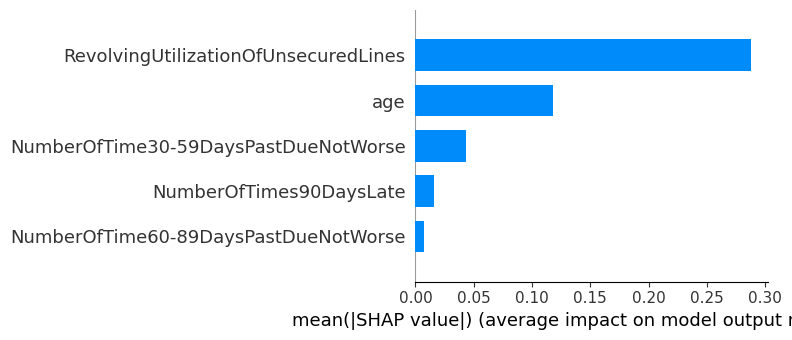

In [ ]:
# Plot the Feature importance. Use 'shap.summary_plot()'

# YOUR CODE HERE
shap.summary_plot(shap_values, xtest, feature_names = best_features, plot_type = "bar")

For a more informative plot, we will look at the summary plot.

### SHAP Summary Plot (Optional)

The summary plot combines feature importance with feature effects:

* Each point on the summary plot shoukd indicate a Shapley value for a feature and an instance.
* The position on the y-axis should be determined by the feature and on the x-axis by the Shapley value.
* Overlapping points should be appearing jittered in y-axis direction, to get a sense of the distribution of the Shapley values per feature.

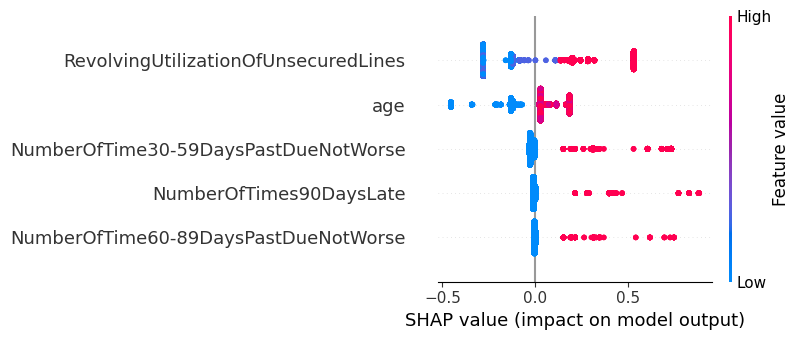

In [ ]:
# Show the Summary plot. Use 'shap.summary_plot()'

# YOUR CODE HERE
shap.summary_plot(shap_values, xtest, feature_names = best_features, plot_type = "dot")

In the summary plot, we see first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

### SHAP Dependence Plot (Optional)

The partial dependence plot shows the marginal effect of one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

To implement SHAP feature dependence plot:

* Pick a feature
* For each data instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis

**Hint:** In order to create a dependence plot, we use `shap.dependence_plot()` function. The function automatically includes another variable that the chosen variable interacts most with. The following plot should show the relationship between “age” and the target variable, and “age” interacts with “NumberOfTime60-89DaysPastDueNotWorse” feature frequently.

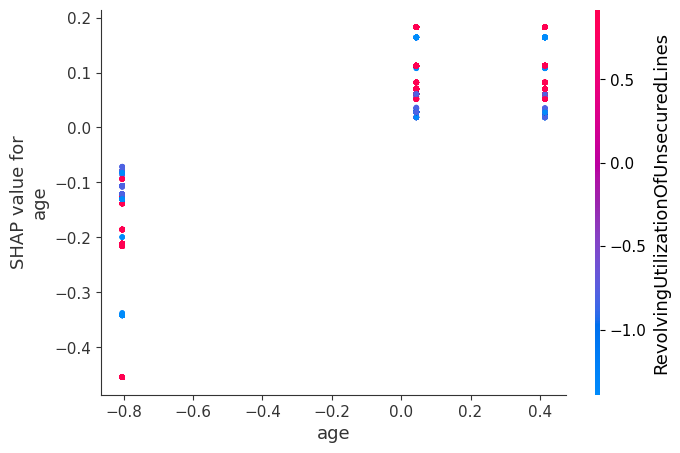

In [ ]:
# Show the Dependence plot. Use 'shap.dependence_plot()'

# YOUR CODE HERE
shap.dependence_plot("age", shap_values, xtest)

### Clustering Shapley Values (Optional)

We can cluster the data with the help of Shapley values. The goal of clustering is to find groups of similar instances.

SHAP clustering works by clustering the Shapley values of each instance. This means that we cluster instances by explanation similarity. All SHAP values have the same unit – the unit of the prediction space. We can use any clustering method. In the following code cell, you need to use hierarchical agglomerative clustering to order the instances.

The plot should consist of many force plots, each of which will explain the prediction of an instance. Rotate the force plots vertically and place them side by side according to their clustering similarity.

In [ ]:
# Show the Force plot for first 100 instances of xtest
shap.initjs()

# Use shap.force_plot()

# YOUR CODE HERE
shap.force_plot(explainer.expected_value, shap_values[0:100], xtest.iloc[0:100], feature_names = best_features)

Put your remarks here regarding the above plot

Also, we can show the force_plot() for the entire set using the below code cell. Note that it may take more than 30 minutes to run the below cell.

In [ ]:
# Force plot for entire xtest
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, xtest.values, feature_names = feature_names)